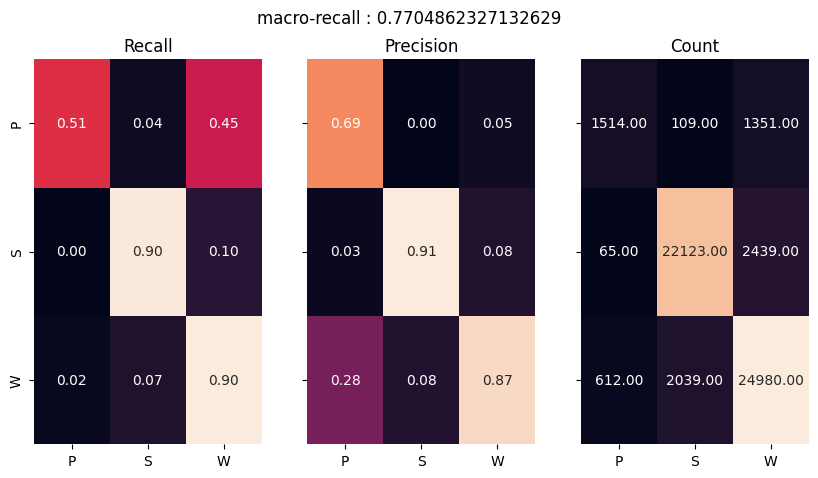

In [8]:
import torch
from lib.utils import load_raw_list,cms
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.nn.functional import relu,one_hot,softmax
from lib.datasets import EEGDataset
from torch import nn
from lib.models import ResNet as MODEL

model = MODEL().cuda()
data_dir = 'data_pt'

test_dataloader = DataLoader(EEGDataset(dir=f'{data_dir}/test',labels=f'{data_dir}/y_test.pt'), batch_size=64, shuffle=False)

checkpoint = torch.load('model_106_0.3189.pt')
model.load_state_dict(checkpoint['model_state_dict'])

# test confusion matrices
y_true = torch.Tensor()
y_pred = torch.Tensor().cuda()
for (X,y) in test_dataloader:
    y_true = torch.cat([y_true,y.argmax(axis=1)])
    y_pred = torch.cat([y_pred,softmax(model(X.cuda()),dim=1).argmax(axis=1)])
y_pred = y_pred
cms(y_true=y_true.cpu(),y_pred=y_pred.cpu(),current_date=None)

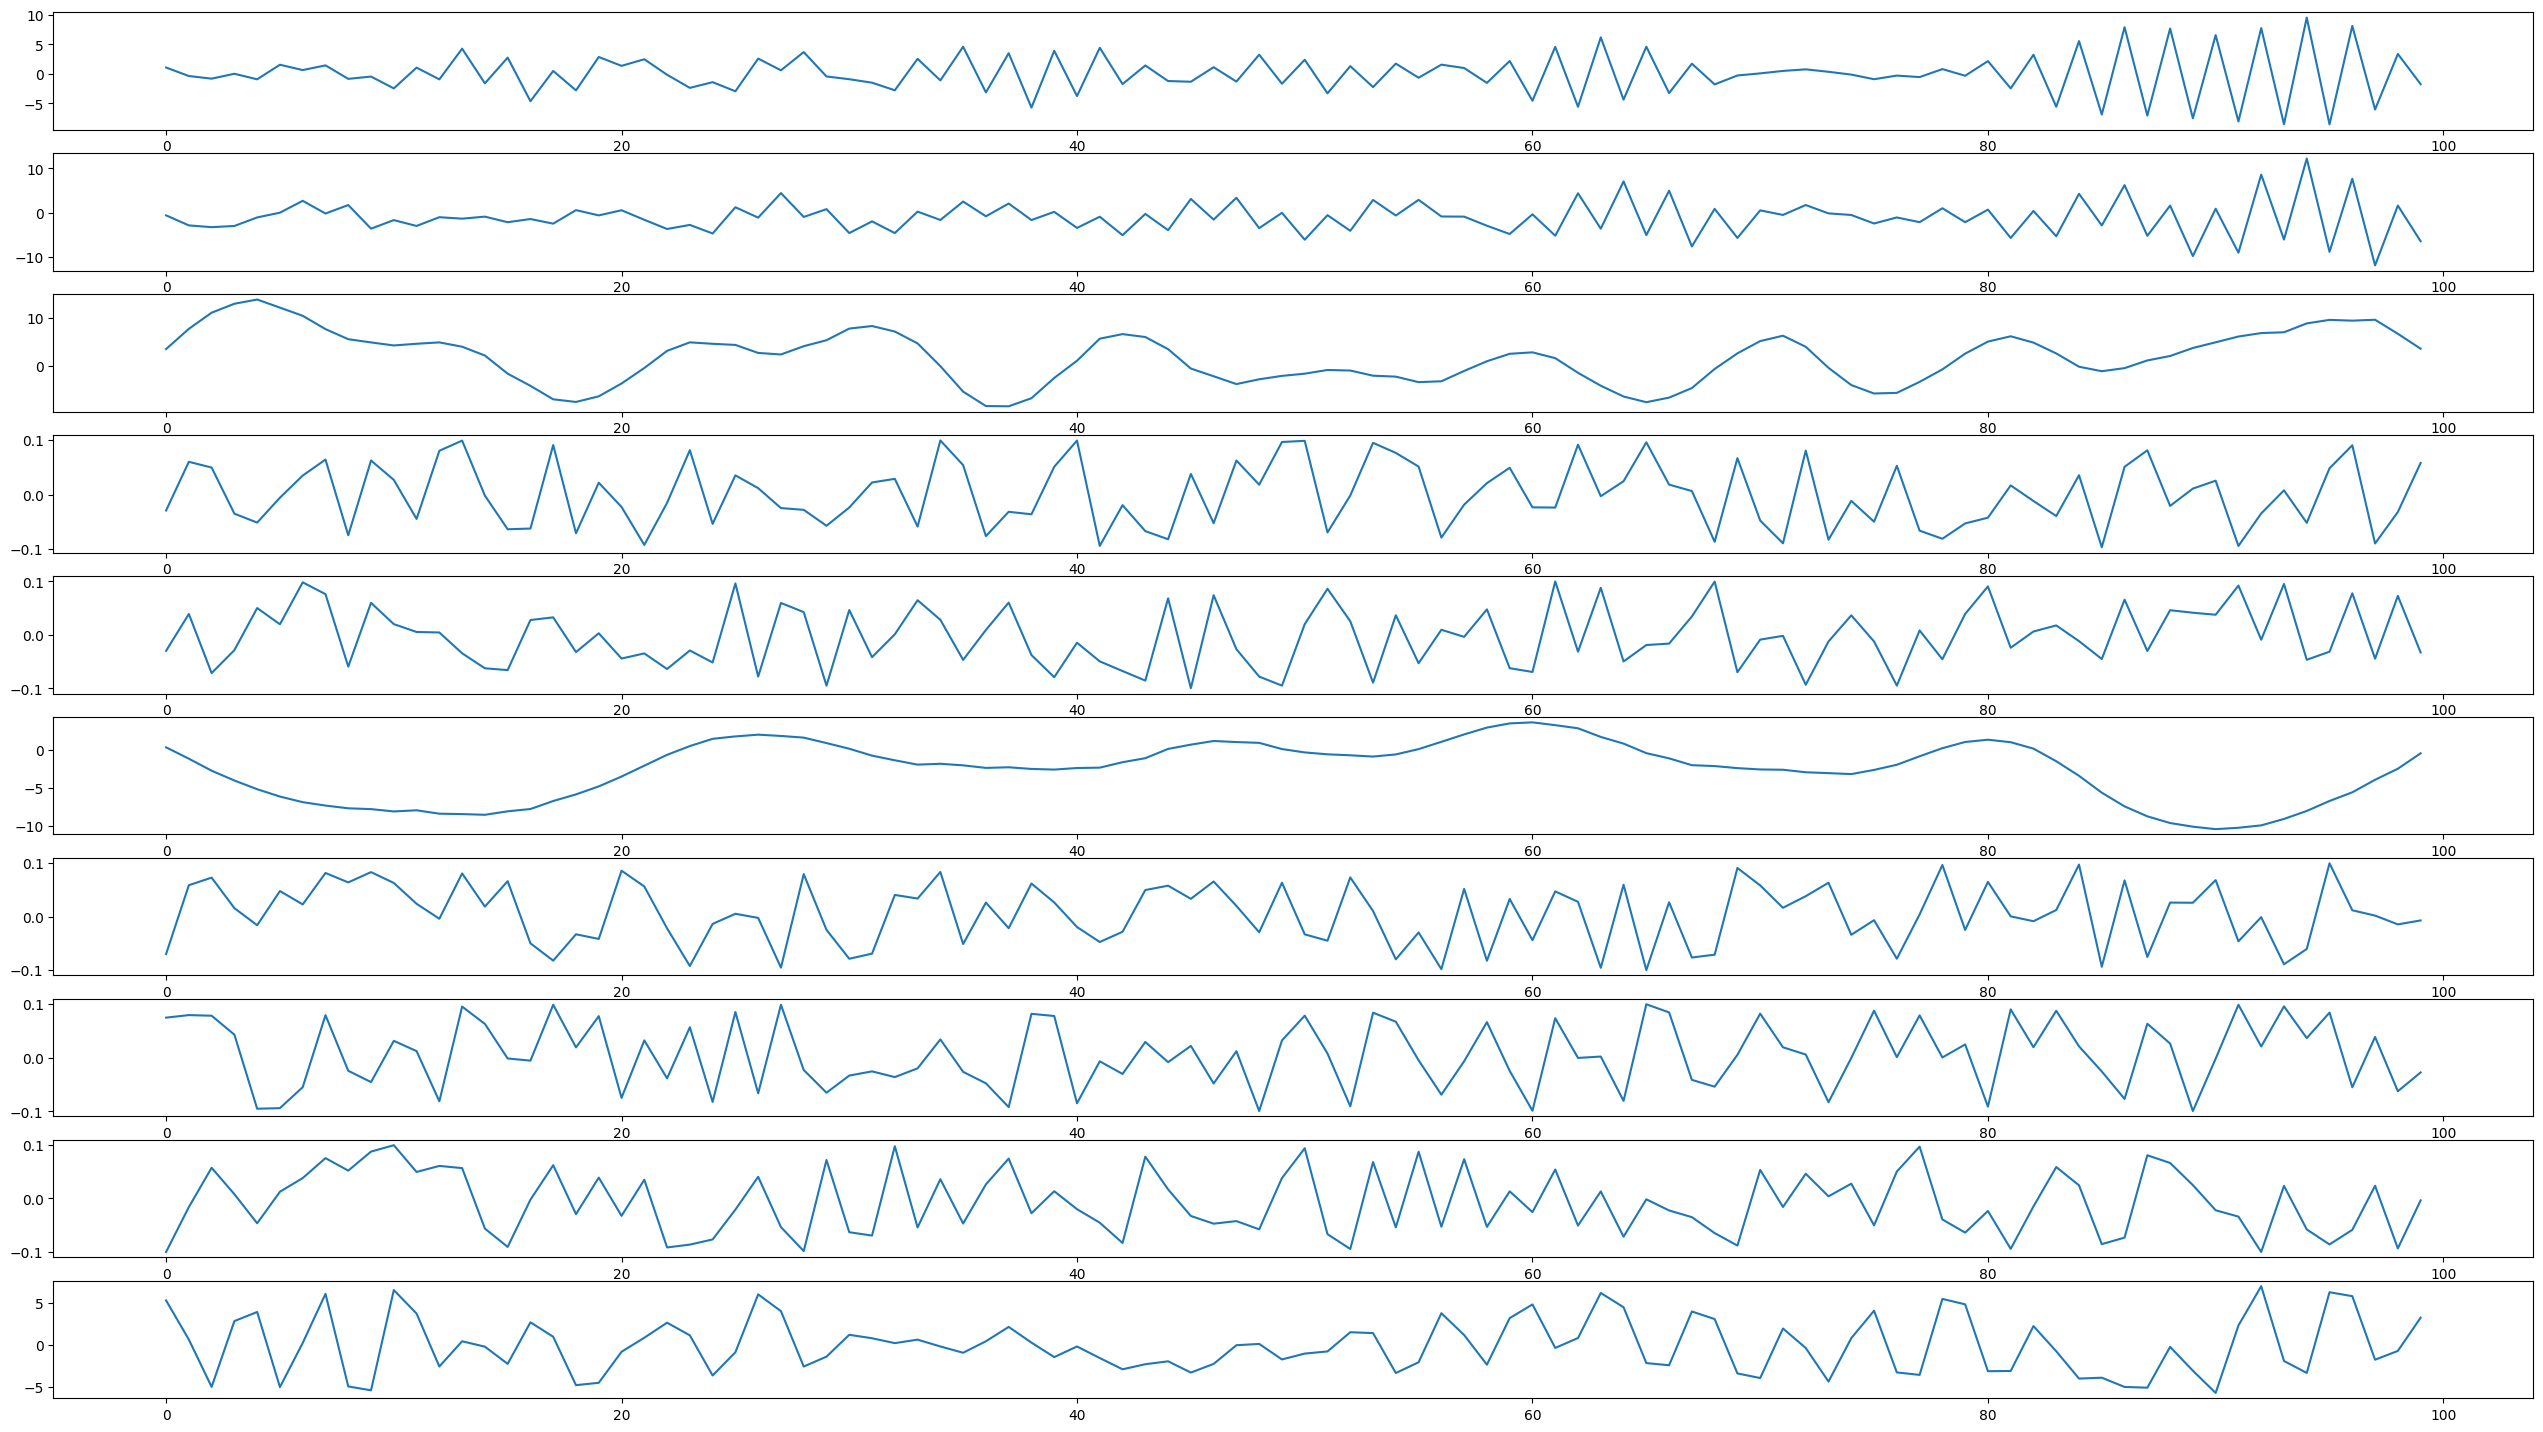

In [5]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(nrows=len(model.c1.weight),ncols=1,figsize=(32,18))
for i in range(len(model.c1.weight)):
    axes[i].plot(model.c1.weight[i].squeeze().detach().cpu())
plt.savefig('figures/kernels.jpg',dpi=500)